In [21]:
from PIL import Image
import random as rnd
import pandas as pd
import numpy as np
import pickle
import cv2
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from models import *
from datasets import *
from torch.utils.data import random_split
from matplotlib import pyplot as plt

In [22]:
checkpoint_dir_vae = 'C:/Users/mrxyz/Documents/MYProject/YndSpecProject/Experiments/vae/Checkpoints/lung_mask_generatorV414.pth'
checkpoint_dir_CNN = 'C:/Users/mrxyz/Documents/MYProject/YndSpecProject/Experiments/StudyOnImageWithMaskFirst/Chekpoints/checkpoint_CNN_model_epoch_36.pth'
train_image_dir = 'C:/Users/mrxyz/Documents/MYProject/YndSpecProject/data/train_images'
test_image_dir = 'C:/Users/mrxyz/Documents/MYProject/YndSpecProject/data/test_images'
csv_file = 'C:/Users/mrxyz/Documents/MYProject/YndSpecProject/data/train_answers.csv'


In [23]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [24]:
mean = [0.51394627, 0.51394627, 0.51394627]
std = [0.24807256, 0.24807256, 0.24807256]

transform_for_CNN = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

transform_for_vae = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [25]:
vae_model = LungMaskGeneratorV4()
cnn_model = CNN()

In [26]:
vae_model.load_state_dict(torch.load(checkpoint_dir_vae, map_location=device))

<All keys matched successfully>

In [27]:
train_dataset = CustomDataset(csv_file=csv_file,
                         root_dir=train_image_dir,
                           transform=transform_for_CNN,
                             mask_transform=transform_for_vae,
                               have_mask=True,
                               vae_model=vae_model)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)


In [28]:
total_size = len(train_dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

train_dataset, test_dataset = random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

In [29]:
model = CNN().to(device)
chekpoint = torch.load(checkpoint_dir_CNN, map_location=device)['model_state_dict']
model.load_state_dict(chekpoint)

<All keys matched successfully>

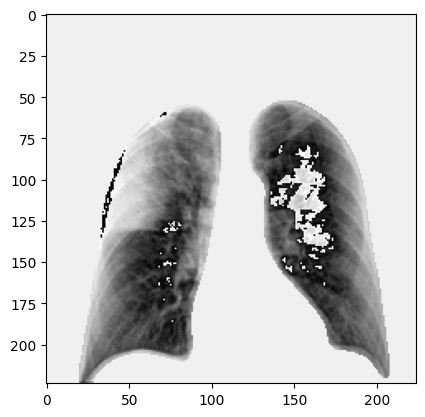

In [30]:
plt.imshow(transforms.ToPILImage()(train_dataset[0][0]))
plt.show()